<i>Updated Oct/04/2023 by </i><img src="https://nw.tsuda.ac.jp/local-icons/nitta-email-tr.gif" /><br />
# 「レバレッジド・インデックスへの投資は損をしやすい」という話

購入時の価格に対して10% の幅で価格が上下して、最終的に元に戻った場合に、レバレッジドインデックスに投資された資産がどうなるかを計算する。

In [1]:
def get_assets(asset, prices, leverage_rate = 1.0):
    assets = [ asset ]
    rates = []
    for i in range(1, len(prices)):
        old_price = prices[i-1]
        new_price = prices[i]
        moving_rate = (new_price - old_price) / old_price
        rates.append(moving_rate * leverage_rate)
        asset *= (1 + moving_rate * leverage_rate)
        assets.append(int(asset))
    return assets, rates

In [2]:
initial_assets = 10000

In [3]:
def get_rate(x):
    return (x - 10000) / 10000 * 100

print(get_rate(9454))
print(get_rate(9333))
print(get_rate(7878))
print(get_rate(8484))

-5.46
-6.67
-21.22
-15.160000000000002


# case 0: 10%上がってから、元に戻る場合

<table>
<tr><th>株価</th><td>10000</td><td>11000</td><td>10000</td></tr>
<tr><th>変動率</th><td></td><td>+10%</td><td>-9.09%</td></tr>
<tr><th>変動率$\times 3$</th><td></td><td>+30%</td><td>-27.27%</td></tr>
<tr><th>資産</th><td>10000</td><td>13000</td><td>9454</td></tr>
</table>

$10000$ 円が $9454$ 円になるので、$-5.46$ %の損失となる。

In [4]:
prices0 = [100, 110, 100]
assets0, rates0 = get_assets(initial_assets, prices0)
assets0x3, rates0x3 = get_assets(initial_assets, prices0, 3)

print(assets0)
print(assets0x3)

print(rates0)
print(rates0x3)

[10000, 11000, 10000]
[10000, 13000, 9454]
[0.1, -0.09090909090909091]
[0.30000000000000004, -0.2727272727272727]


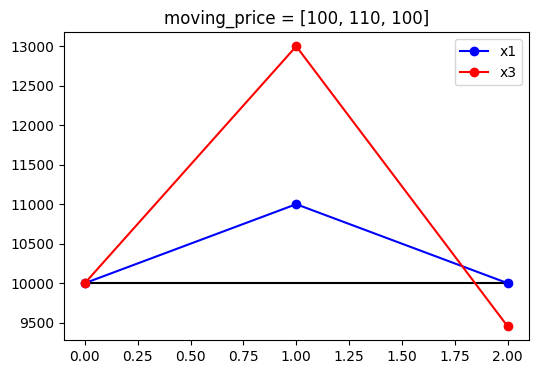

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
n0 = len(assets0)
ax.plot([0, n0-1], [initial_assets, initial_assets], c='black')
ax.plot(range(n0), assets0, c='blue', marker='o', label='x1')
ax.plot(range(n0), assets0x3, c='red', marker='o', label='x3')
ax.set_title(f'moving_price = {prices0}')
ax.legend()
plt.show()

# case 1: 10%下がってから、元に戻る場合

<table>
<tr><th>株価</th><td>10000</td><td>9000</td><td>10000</td></tr>
<tr><th>変動率</th><td></td><td>-10%</td><td>+11.11%</td></tr>
<tr><th>変動率$\times 3$</th><td></td><td>-30%</td><td>+33.33%</td></tr>
<tr><th>資産</th><td>10000</td><td>7000</td><td>9333</td></tr>
</table>

$10000$ 円が $9333$ 円になるので、$-6.67$ %の損失となる。

In [6]:
prices1 = [10000, 9000, 10000]
assets1, rates1 = get_assets(initial_assets, prices1)
assets1x3, rates1x3 = get_assets(initial_assets, prices1, 3)

print(assets1)
print(assets1x3)
print(rates1)
print(rates1x3)

[10000, 9000, 10000]
[10000, 7000, 9333]
[-0.1, 0.1111111111111111]
[-0.30000000000000004, 0.3333333333333333]


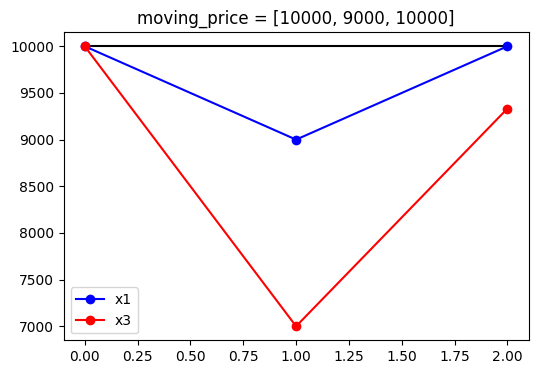

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
n1 = len(assets1)
ax.plot([0, n1-1], [initial_assets, initial_assets], c='black')
ax.plot(range(n1), assets1, c='blue', marker='o', label='x1')
ax.plot(range(n1), assets1x3, c='red', marker='o', label='x3')
ax.set_title(f'moving_price = {prices1}')
ax.legend()
plt.show()

## case 2: 10%上がってから10%下がって、最終的に元に戻る場合

<table>
<tr><th>株価</th><td>10000</td><td>11000</td><td>9000</td><td>10000</td></tr>
<tr><th>変動率</th><td></td><td>+10%</td><td>-18.18%</td><td>+11.11</td></tr>
<tr><th>変動率$\times 3$</th><td></td><td>+30%</td><td>-54.55%</td><td>+33.33%</td></tr>
<tr><th>資産</th><td>10000</td><td>13000</td><td>5909</td><td>7878</td></tr>
</table>

$10000$ 円が $7878$ 円になるので $-21.22$ % の損失となる。

In [8]:
prices2 = [100, 110, 90, 100]
assets2, rates2 = get_assets(initial_assets, prices2)
assets2x3, rates2x3 = get_assets(initial_assets, prices2, 3)

print(assets2)
print(assets2x3)
print(rates2)
print(rates2x3)

[10000, 11000, 9000, 10000]
[10000, 13000, 5909, 7878]
[0.1, -0.18181818181818182, 0.1111111111111111]
[0.30000000000000004, -0.5454545454545454, 0.3333333333333333]


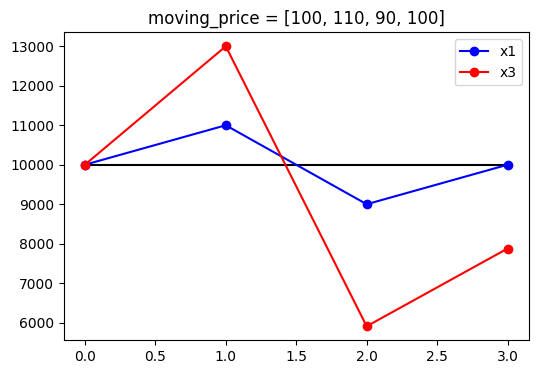

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
n2 = len(assets2)
ax.plot([0, n2-1], [initial_assets, initial_assets], c='black')
ax.plot(range(n2), assets2, c='blue', marker='o', label='x1')
ax.plot(range(n2), assets2x3, c='red', marker='o', label='x3')
ax.set_title(f'moving_price = {prices2}')
ax.legend()
plt.show()

## case 3: 10%下がってから10%上がって、最終的に元に戻る場合

<table>
<tr><th>株価</th><td>10000</td><td>9000</td><td>11000</td><td>10000</td></tr>
<tr><th>変動率</th><td></td><td>-10%</td><td>+22.22%</td><td>-9.09%</td></tr>
<tr><th>変動率$\times 3$</th><td></td><td>-30%</td><td>+66.67%</td><td>-27.27%</td></tr>
<tr><th>資産</th><td>10000</td><td>13000</td><td>5909</td><td>7878</td></tr>
</table>


$10000$ 円が $8484$ 円になるので $-15.16$ % の損失となる。

In [10]:
prices3 = [100, 90, 110, 100]
assets3, rates3 = get_assets(10000, prices3)
assets3x3, rates3x3 = get_assets(10000, prices3, 3)

print(assets3)
print(assets3x3)
print(rates3)
print(rates3x3)

print(get_rate(assets3x3[3]))

[10000, 9000, 11000, 10000]
[10000, 7000, 11666, 8484]
[-0.1, 0.2222222222222222, -0.09090909090909091]
[-0.30000000000000004, 0.6666666666666666, -0.2727272727272727]
-15.160000000000002


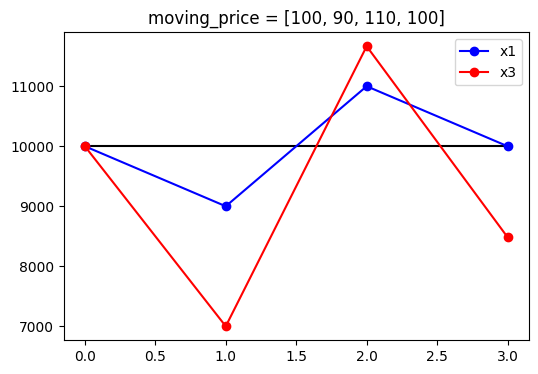

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
n3 = len(assets3)
ax.plot([0, n3-1], [initial_assets, initial_assets], c='black')
ax.plot(range(n3), assets3, c='blue', marker='o', label='x1')
ax.plot(range(n3), assets3x3, c='red', marker='o', label='x3')
ax.set_title(f'moving_price = {prices3}')
ax.legend()
plt.show()